# PySPARK Assignment

Yahlly Schein

## Instructions:
###### 1. All the instructions are in the file
###### 2. Pandas library should not be used anywhere.
###### 3. PySpark sql should not be used anywhere.

## Imports

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col, asc, desc
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import avg, when
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession.builder.getOrCreate()

## Load data

In [ ]:
#Load data:
file_location = "/FileStore/tables/medical_appointments-4.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
2.9872499824296E13,5642903,F,2016-04-29T18:38:08.000+0000,2016-04-29T00:00:00.000+0000,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.58997776694438E14,5642503,M,2016-04-29T16:08:27.000+0000,2016-04-29T00:00:00.000+0000,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962299951E12,5642549,F,2016-04-29T16:19:04.000+0000,2016-04-29T00:00:00.000+0000,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.67951213174E11,5642828,F,2016-04-29T17:29:31.000+0000,2016-04-29T00:00:00.000+0000,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186448183E12,5642494,F,2016-04-29T16:07:23.000+0000,2016-04-29T00:00:00.000+0000,56,JARDIM DA PENHA,0,1,1,0,0,0,No
9.5985133231274E13,5626772,F,2016-04-27T08:36:51.000+0000,2016-04-29T00:00:00.000+0000,76,REPÚBLICA,0,1,0,0,0,0,No
7.33688164476661E14,5630279,F,2016-04-27T15:05:12.000+0000,2016-04-29T00:00:00.000+0000,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3.449833394123E12,5630575,F,2016-04-27T15:39:58.000+0000,2016-04-29T00:00:00.000+0000,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5.6394729949972E13,5638447,F,2016-04-29T08:02:16.000+0000,2016-04-29T00:00:00.000+0000,21,ANDORINHAS,0,0,0,0,0,0,No
7.8124564369297E13,5629123,F,2016-04-27T12:48:25.000+0000,2016-04-29T00:00:00.000+0000,19,CONQUISTA,0,0,0,0,0,0,No


## Part 1: PySpark Dataframe
#### 80 points in total - 16 points per question

### Question 1: Count the number of no-shows for patients who do not have diabetes and whose age is greater than their gender's average age.
###### The column that counts no-shows per gender should be called 'cnt_no_show'
###### Show the results in a bar chart

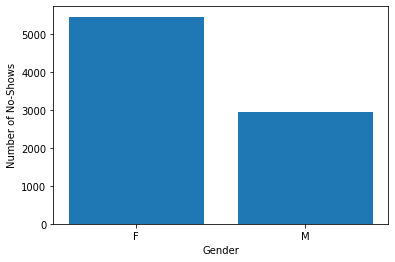

In [ ]:
#Answer:
avg_age = df.groupby("Gender").agg(F.mean("Age").alias("avg_age"))
join_df = df.join(avg_age, "Gender" , "left")
new_df = join_df.filter((col("Age") > col("avg_age")) & (col("Diabetes") == 0) & (col("No-show") == "Yes"))

final_count = new_df.groupby("Gender").agg(F.count("AppointmentID").alias('cnt_no_show')).toPandas()
#display(final_count)
plt.bar(final_count['Gender'], final_count['cnt_no_show'])

# set the x-axis and y-axis labels
plt.xlabel('Gender')
plt.ylabel('Number of No-Shows')

# show the plot
plt.show()


### Question 2: How many patients scheduled at least two appointments in the same week but did not show up?
###### Count the number of patients that scheduled two appointments or more within a week in May 2016 and did not show up for any of them.
###### Note: use the "AppointmentDay" column!
###### print the results in informative way. For example: "The number of patients that scheduled two appointments or more within a week in may 2016 and did not show up for any of them is: ....""

In [ ]:
#Answer:
# we assume "same week" means same week of the year

# filter - only rows where the appointment was in May 2016
df2 = df.filter(df['AppointmentDay'].like('%2016-05%'))

# extract the week of the year from the AppointmentDay column and add it as a new column
df2 = df2.withColumn('week', F.weekofyear('AppointmentDay'))
# create a new column that converts the values of an existing column (Yes and No) to a new value (1 and 8)
df2 = df2.withColumn('no_show_int', when(df2['No-show'] == 'Yes', 1).otherwise(8))

# group the data by patient id and week and sum value in the new column
# for every patient and week we will sum the new column's
df2 = df2.groupBy(['PatientId', 'week']).agg(F.sum(col("no_show_int")).alias('cnt_no_show'))


# if the total sum in the new sum column is lower than 2 - he had 1 or 0 appointments in theis week
# if the total sum in the new sum column is more than 7 - he had at least 1 appointment that he showed up to (which "costs" 8 and made this sum, more that 7)
df_no_shows = df2.filter((df2['cnt_no_show'] >= 2) & (df2['cnt_no_show'] <= 7))
#display(df_no_shows)
# # count the number of patients
cnt = df_no_shows.select('PatientId').distinct().count()

# print
print(f'The number of patients that scheduled two appointments or more within a week in May 2016 and did not show up for any of them is: {cnt}')


The number of patients that scheduled two appointments or more within a week in May 2016 and did not show up for any of them is: 872


### Question 3: Are SMS reminders effective??
##### For patients who received a text message at least once, calculate the following:

#####  1. The percentage of patients who didn't show up for their appointments and received a text message.
#####  2. The percentage of patients who didn't show up for their appointments and didn't received a text message.
#####  3. The percentage of patients who show up for their appointments with receiving a text message.
#####  4. The percentage of patients who show up for their appointments without receiving a text message.
  
###### Limit the results to two decimal places.
###### Print for the results for each one of the questions above!

In [ ]:
#Answer:
df_sms = df.filter(df['SMS_received'] == 1)
patience = df_sms.select('PatientId').distinct()
total = patience.count()
#display(total)
join_df2 = patience.join(df, "PatientId" , "inner")

#1
cnt_no_show_received = join_df2.filter((join_df2['No-show'] == 'Yes') & (join_df2['SMS_received'] == 1)).select("PatientId").distinct().count()
value1 =cnt_no_show_received*100/ total
print(f"1. The percentage of patients who didn't show up for their appointments and received a text message: {round(value1,2)} %")

#2
cnt_no_show_no_received = join_df2.filter((join_df2['No-show'] == 'Yes') & (join_df2['SMS_received'] == 0)).select("PatientId").distinct().count()
value2 = cnt_no_show_no_received*100/ total
print(f"\n2. The percentage of patients who didn't show up for their appointments and didn't received a text message: {round(value2,2)} %")

#3
cnt_show_received = join_df2.filter((join_df2['No-show'] == 'No') & (join_df2['SMS_received'] == 1)).select("PatientId").distinct().count()
value3 = cnt_show_received*100/ total
print(f"\n3. The percentage of patients who show up for their appointments with receiving a text message: {round(value3,2)} %")

#4
cnt_show_no_received = join_df2.filter((join_df2['No-show'] == 'No') & (join_df2['SMS_received'] == 0)).select("PatientId").distinct().count()
value4 = cnt_show_no_received*100/ total
print(f"\n4. The percentage of patients who show up for their appointments without receiving a text message: {round(value4,2)} %")


1. The percentage of patients who didn't show up for their appointments and received a text message: 32.41 %

2. The percentage of patients who didn't show up for their appointments and didn't received a text message: 11.98 %

3. The percentage of patients who show up for their appointments with receiving a text message: 76.74 %

4. The percentage of patients who show up for their appointments without receiving a text message: 39.76 %


### Question 4: Neighborhood distribution of alcoholism
##### For each neighborhood, show the percentage of patients who drink alcohol
###### Show the top 5 neighborhoods with the highest ratio of alcoholism
###### Sort results in DESC order.
###### Limit the result to two decimal places.
###### Show the reuslts in a bar chart

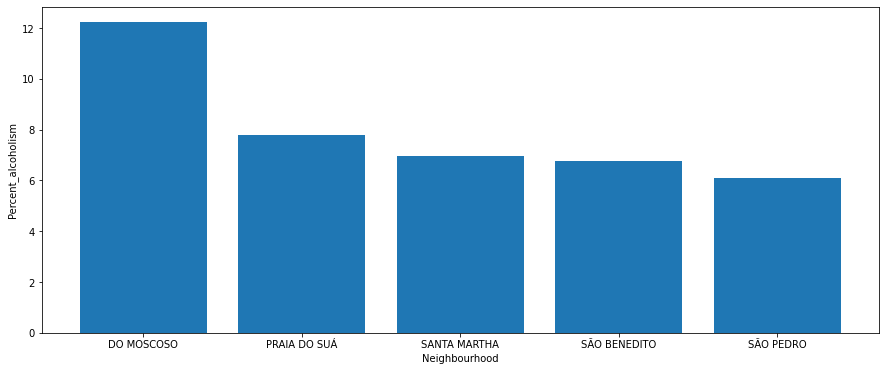

In [ ]:
#Answer:
df_alc = df.select('PatientId', 'Neighbourhood', 'Alcoholism').distinct()
#group the data by neighborhood and count the number of patients who drink alcohol
df_alcoholism = df_alc.groupBy('Neighbourhood').agg(F.sum('Alcoholism').alias('cnt_alcoholism'))
# count the total number of patients for each neighborhood
df_t = df.select('PatientId', 'Neighbourhood').distinct()
df_total = df_t.groupBy('Neighbourhood').count()

# join the two dataframes and calculate the percentage of patients who drink alcohol
df_result = df_alcoholism.join(df_total, on='Neighbourhood', how='inner')
df_result = df_result.withColumn('percent_alcoholism', F.format_number((df_result['cnt_alcoholism'] / df_result['count'])*100, 2).cast('float'))

# sort the data in descending order and show the top 5 neighborhoods with the highest ratio of alcoholism
df_result = df_result.sort(F.desc('percent_alcoholism')).limit(5).toPandas()

plt.figure(figsize=(15, 6))
plt.bar(df_result['Neighbourhood'], df_result['percent_alcoholism'])

# set the x-axis and y-axis labels
plt.xlabel('Neighbourhood')
plt.ylabel('Percent_alcoholism')

plt.show()


### Question 5: Are people with background diseases more likely to attend medical appointments?
#### Calculate the average number of appointments a patient with background disease schedules with a physician. Do the same for patients without any background diseases.
##### Note: You are required to create a new binary column using F.when function called "background_diseases" in the following manner: if the patient has diabetes, hypertension, or handcap, the value should be 1 and 0 otherwise.
###### Limit the result to two decimal places.
###### Print the results in informative way.

In [ ]:
# create a new column called "background_diseases" that is 1 if the patient has diabetes, hypertension, or handcap and 0 otherwise
df_back = df.withColumn('background_diseases', when((df['Diabetes'] == 1) | (df['Hipertension'] == 1) | (df['Handcap'] == 1), 1).otherwise(0))

# calculate the average number of appointments for patients with background diseases
df_yes_back = df_back.filter(df_back['background_diseases'] == 1)
num_yes = df_yes_back.select('PatientId').distinct().count()
total_appointments_yes = df_yes_back.count()

# calculate the average number of appointments for patients without background diseases
df_no_back = df_back.filter(df_back['background_diseases'] == 0)
num_no = df_no_back.select('PatientId').distinct().count()
total_appointments_no = df_no_back.count()

avg_appointments_diseases =  total_appointments_yes / num_yes
avg_appointments_no_diseases = total_appointments_no / num_no
# print the results
print(f'The average number of appointments for patients with background diseases is: {avg_appointments_diseases:.2f}')
print(f'The average number of appointments for patients without background diseases is: {avg_appointments_no_diseases:.2f}')

The average number of appointments for patients with background diseases is: 1.79
The average number of appointments for patients without background diseases is: 1.77


## part 2: PySpark ML
#### 20 points

#### The purpose of this part is to train a Random Forest classifier to predict whether a patient will show up for their scheduled appointment (binary classification task)

### Data Preprocess:
##### 1. Remove unrelevant columns (e.g. "PatientId" etc.).
##### 2. Change categorical columns to numeric ones.
##### 3. Split the data to train and test (70% train and 30% test)
##### ---------------------------------------------------------------------
### Training & Prediction
##### 4. Train a Random-Forest model on the training data and predict on the testing data.
##### ---------------------------------------------------------------------
### Evaluation - evaluate model performance on the test data
##### 5. Calculate: accuracy and auc
##### ---------------------------------------------------------------------
### Bonus - 2 points
#### 6. Why the auc score is low compared to the accuracy score?

In [ ]:
#Answer:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.sql.functions import lower, col
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/FileStore/tables/medical_appointments-4.csv")

df22 = df.drop("PatientId","AppointmentID", "ScheduledDay", "AppointmentDay")

categoricalColumns = ["Gender", "Neighbourhood"]
stages = [] # stages in our Pipeline
for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    # Indexes each categorical column using the StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index").setHandleInvalid("skip")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]

# Transform all numeric features into a vector using VectorAssembler
# Use a VectorAssembler to combine all the feature columns into a single vector column.
numericCols = ["Age", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

# Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol="No-show", outputCol="patient-will-show-up").setHandleInvalid("skip")
stages += [label_stringIdx]

#Run the stages as a Pipeline. This puts the data through all of the feature transformations we described in a single call.
partialPipeline = Pipeline().setStages(stages)
pipelineModel = partialPipeline.fit(df22)
preppedDataDF = pipelineModel.transform(df22)

# Keep relevant columns
selectedcols = ["patient-will-show-up", "features"]
ml_dataset = preppedDataDF.select(selectedcols)
#Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = ml_dataset.randomSplit([0.7, 0.3], seed=100)

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="patient-will-show-up", featuresCol="features")

# Train model with Training Data
rfModel = rf.fit(trainingData)

# Make predictions on test data using the Transformer.transform() method.
predictions = rfModel.transform(testData)

# View model's predictions
selected = predictions.select("patient-will-show-up", "prediction")
# display(selected)

# Evaluate model
evaluator = MulticlassClassificationEvaluator(labelCol="patient-will-show-up", predictionCol="prediction")
acc = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
print("accuarcy is %s" % acc)

evaluator = BinaryClassificationEvaluator(labelCol="patient-will-show-up", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print("auc is %s" % auc)

accuarcy is 0.7972818225650916
auc is 0.6056831889789513


Bonus :

In [ ]:
num_no = df.filter(df['No-show'] == "Yes").count()
num_yes = df.filter(df['No-show'] == "No").count()
num_total = df.count()
print(f"percentage of appointment that the client hasn't arrived to: {num_no/num_total}")
print(f"percentage of appointment that the client has arrived to: {num_yes/num_total}")

percentage of appointment that the client hasn't arrived to: 0.20193255946510807
percentage of appointment that the client has arrived to: 0.798067440534892


It is possible for the AUC (area under the curve) score to be lower than the accuracy score because the AUC score is based on the true positive rate and false positive rate, whereas the accuracy score is based on the number of correct predictions made.
The AUC score takes into account the trade-off between the true positive rate and the false positive rate, whereas the accuracy score does not.
In our example, the classifier that is trained to predict whether an individual will arrive to the appointment based on the features.
As shown above, the prevalence of the NO-shows in the population is low, then the classifier may achieve high accuracy by simply predicting that all individuals (or a big percantage of them) will arrive to the appointment. However, the AUC score of this classifier may be low because it is not doing a good job of ranking the individuals based on their likelihood of arriving.
In addition, as we can see, the accuracy of the model is almost equal to the percentage of appointment that the client has arrived to.

##Good Luck!